<a href="https://colab.research.google.com/github/maincarey/ML/blob/master/HRlogistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv("/content/sample_data/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


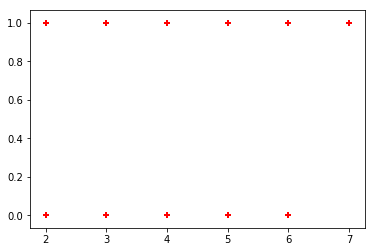

In [0]:
plt.scatter(df.number_project,df.left,marker='+',color='red')

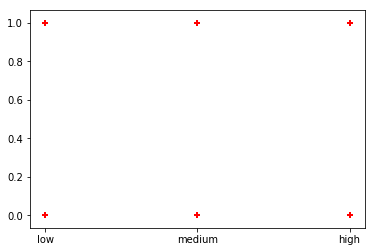

In [0]:
plt.scatter(df.salary,df.left,marker='+',color='red')

SyntaxError: ignored

In [0]:
data = df.salary
labels = df.salary
plt.xticks(range(len(data)), labels)
plt.xlabel('Salary')
plt.ylabel('Left')
plt.title('I am title')
plt.bar(range(len(data)), data) 
plt.show()

KeyboardInterrupt: ignored

<BarContainer object of 14999 artists>

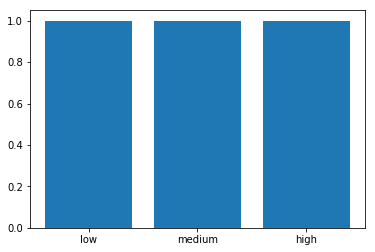

In [0]:
plt.bar(df.salary,df.left) 

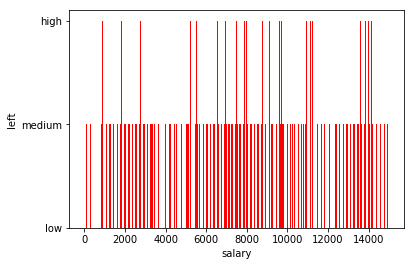

In [0]:
plt.xlabel('salary')
plt.ylabel('left')
data = df.salary
plt.bar(range(len(data)), data, color='red')
plt.show()

In [0]:
left = df[df.left==1]
left.shape

(3571, 10)

In [0]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [0]:
# check the percentages for each column against leaving
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


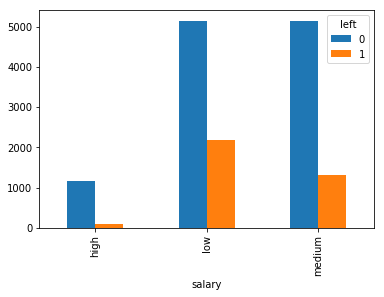

In [0]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

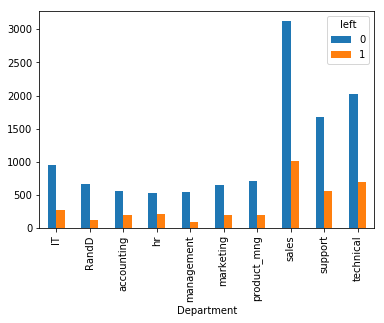

In [0]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [0]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [0]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [0]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [0]:

df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [0]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [0]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [0]:
y = df.left

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2)

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [0]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
12227,0.44,149,0,0,1,0
14259,0.40,148,0,0,1,0
10057,0.72,109,0,0,1,0
1047,0.37,151,0,1,0,0
3471,0.95,209,0,0,1,0
9852,0.68,185,0,0,0,1
11222,0.97,177,0,0,1,0
1590,0.43,147,0,0,0,1
3493,0.63,243,0,0,0,1
12699,0.38,156,0,0,0,1


In [0]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [0]:

model.score(X_test,y_test)

0.7838333333333334